In [2]:
import numpy as np
import pandas as pd
from fbprophet  import Prophet 

Importing plotly failed. Interactive plots will not work.


In [3]:
df = pd.read_csv(r"G:\traindata\yddata\YDday2.csv")
df['y'] = np.log(df['y'])
df.head()

,ds,y
0,2019/11/22,5.303802
1,2019/11/23,8.960558
2,2019/11/24,6.316804
3,2019/11/25,9.228435
4,2019/11/26,6.978214


In [4]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
future = m.make_future_dataframe(periods=360)
future['floor'] = 5.4
future.tail()

,ds,floor
604,2021-07-27,5.4
605,2021-07-28,5.4
606,2021-07-29,5.4
607,2021-07-30,5.4
608,2021-07-31,5.4


In [31]:
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-11-22,6.444229,5.347354,7.364598,6.444229,6.444229,-0.088920,-0.088920,-0.088920,-0.088920,-0.088920,-0.088920,0.0,0.0,0.0,6.355309
1,2019-11-23,6.457083,5.363075,7.471421,6.457083,6.457083,-0.015908,-0.015908,-0.015908,-0.015908,-0.015908,-0.015908,0.0,0.0,0.0,6.441176
2,2019-11-24,6.469938,5.290389,7.419194,6.469938,6.469938,-0.093568,-0.093568,-0.093568,-0.093568,-0.093568,-0.093568,0.0,0.0,0.0,6.376370
3,2019-11-25,6.482793,5.403077,7.433536,6.482793,6.482793,-0.117004,-0.117004,-0.117004,-0.117004,-0.117004,-0.117004,0.0,0.0,0.0,6.365789
4,2019-11-26,6.495647,5.468292,7.667946,6.495647,6.495647,0.052621,0.052621,0.052621,0.052621,0.052621,0.052621,0.0,0.0,0.0,6.548268


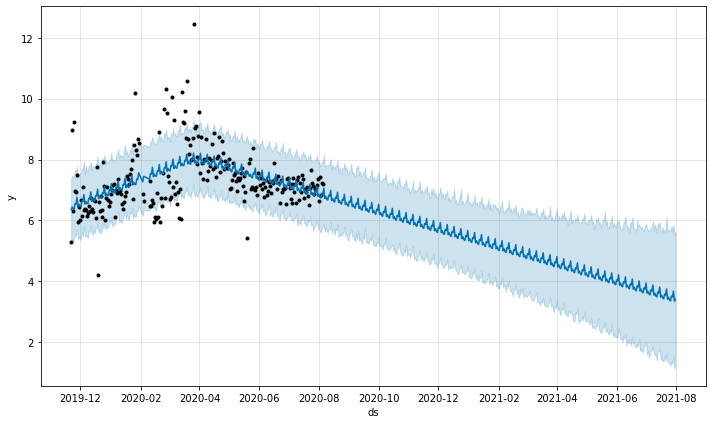

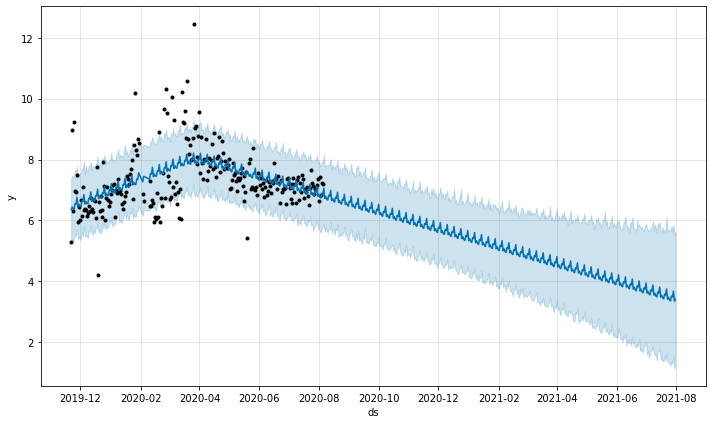

In [32]:
m.plot(forecast)

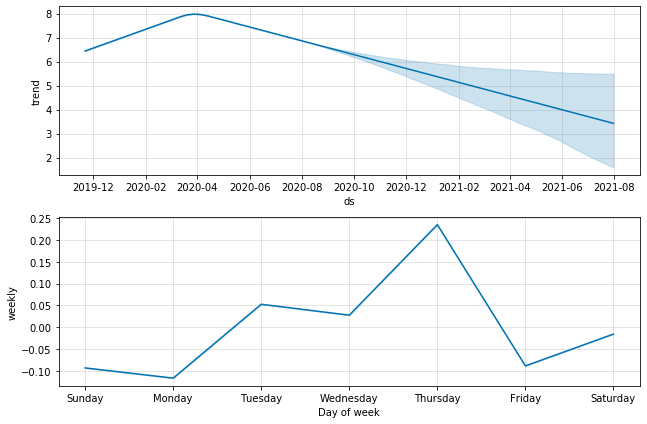

In [33]:
m.plot_components(forecast);

In [34]:
from sklearn.metrics import mean_absolute_error
import math

In [25]:
x = np.exp(df['y'] )

In [11]:
y = np.exp(forecast['yhat'])

In [12]:
mean_absolute_error(x,y)

2661.9237268109514

In [13]:
mean_absolute_error(df['y'],forecast['yhat'])

0.565757025823339